# Python Questions

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#### 1.  Select all the data from table `house_price_data` to check if the data was imported correctly.

#### 2.  Drop the column `date` from the data frame, as we would not use it in the analysis. Select all the data from the table to verify if the command worked. Limit your returned results to 10.

In [16]:
df = pd.read_csv('../data/raw_data.csv', delimiter= ';')    # Import data
df.drop(columns='date', inplace = True)                                     # Drop `date` column

# View 10 results
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


#### 3. How many rows of data do you have?

In [17]:
# Shape of data
print("N° rows: {}\nN° columns: {}".format(df.shape[0], df.shape[1]))

N° rows: 21597
N° columns: 20


#### 4.  Find the unique values of the following columns:

    - What are the unique values in the column `bedrooms`?
    - What are the unique values in the column `bathrooms`?
    - What are the unique values in the column `floors`?
    - What are the unique values in the column `condition`?
    - What are the unique values in the column `grade`?


In [18]:
columns = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']

for c in columns:
    values = pd.unique(df[c])
    values.sort()
    print('• Unique values of "{}" is: {}\n'.format(c, values))

• Unique values of "bedrooms" is: [ 1  2  3  4  5  6  7  8  9 10 11 33]

• Unique values of "bathrooms" is: [0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5  7.75
 8.  ]

• Unique values of "floors" is: [1.  1.5 2.  2.5 3.  3.5]

• Unique values of "condition" is: [1 2 3 4 5]

• Unique values of "grade" is: [ 3  4  5  6  7  8  9 10 11 12 13]



#### 5.  Arrange the data in decreasing order by the price of the house. Return only the IDs of the top 10 most expensive houses in your data.

In [19]:
# Top 10 properties with price most expansive
df.sort_values('price', ascending = False)['id'].head(10).index.to_list()

[7245, 3910, 9245, 4407, 1446, 1313, 1162, 8085, 2624, 8629]

#### 6.  What is the average price of all the properties in your data?

In [20]:
# Average Price
print("Average Price of all the properties: ", df['price'].mean())

Average Price of all the properties:  540296.5735055795


#### 7. In this exercise use a simple `groupby` to check the properties of some of the categorical variables in our data

1.  What is the average price of the houses grouped by bedrooms? The returned result should have only two columns: `Bedrooms` and `Average price`. 
2.  What is the average `sqft_living` of the houses grouped by bedrooms? The returned result should have only two columns, `Bedrooms` and `Average_sqft_living`.
3.  What is the average price of the houses with a waterfront and without a waterfront? The returned result should have only two columns, `Waterfront` and `Average_price`.
4.  Is there any correlation between the columns `condition` and `grade`? Also, create a plot to visually check if there is a positive correlation or negative correlation or no correlation between both variables.
5.  Get the number of houses in each category (ie number of houses for a given `condition`) to assess if that category is well represented in the dataset to include it in your analysis. For eg. If the category is under-represented as compared to other categories, ignore that category in this analysis

a.  What is the average price of the houses grouped by bedrooms? The returned result should have only two columns: `Bedrooms` and `Average price`.

In [21]:
pd.DataFrame(df.groupby(['bedrooms'])['price'].mean()).rename({'price': 'Average_price'}, axis = 1)

,Average_price
bedrooms,
1,3.182395e+05
2,4.013877e+05
3,4.662766e+05
4,6.355647e+05
5,7.868741e+05
6,8.258535e+05
7,9.514478e+05
8,1.105077e+06
9,8.939998e+05


b.  What is the average `sqft_living` of the houses grouped by bedrooms? The returned result should have only two columns, `Bedrooms` and `Average_sqft_living`.

In [22]:
pd.DataFrame(df.groupby(['bedrooms'])['sqft_living'].mean()).rename({'sqft_living': 'Average_sqft_living'}, axis = 1)

,Average_sqft_living
bedrooms,
1,888.153061
2,1239.752899
3,1805.837235
4,2554.649666
5,3047.545284
6,3284.341912
7,3974.210526
8,3800.000000
9,3775.000000


c.  What is the average price of the houses with a waterfront and without a waterfront? The returned result should have only two columns, `Waterfront` and `Average_price`.

In [23]:
pd.DataFrame(df.groupby(['waterfront'])['price'].mean()).rename({'price': 'Average_price'}, axis = 1)

,Average_price
waterfront,
0,5.317623e+05
1,1.662524e+06


d.  Is there any correlation between the columns `condition` and `grade`? Also, create a plot to visually check if there is a positive correlation or negative correlation or no correlation between both variables.

In [24]:
corr = df.corr()
cond_grade_corr = round(corr['condition']['grade'], 4)

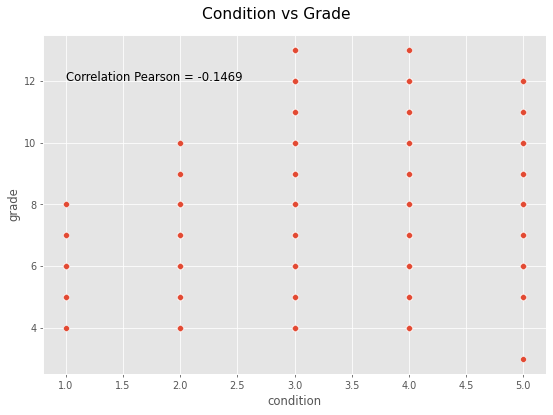

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6), dpi = 70, tight_layout = True)

sns.scatterplot(data = df, x = 'condition', y = 'grade', ax = ax)

fig.suptitle("Condition vs Grade", fontsize = 16)
ax.text(s = 'Correlation Pearson = {}'.format(cond_grade_corr), x = 1, y = 12, fontdict={'fontsize': 12})

plt.show()

No existe correlación aparente entre las variables `grade` y `condition`.

e.  Get the number of houses in each category (ie number of houses for a given `condition`) to assess if that category is well represented in the dataset to include it in your analysis. For eg. If the category is under-represented as compared to other categories, ignore that category in this analysis

In [26]:
columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

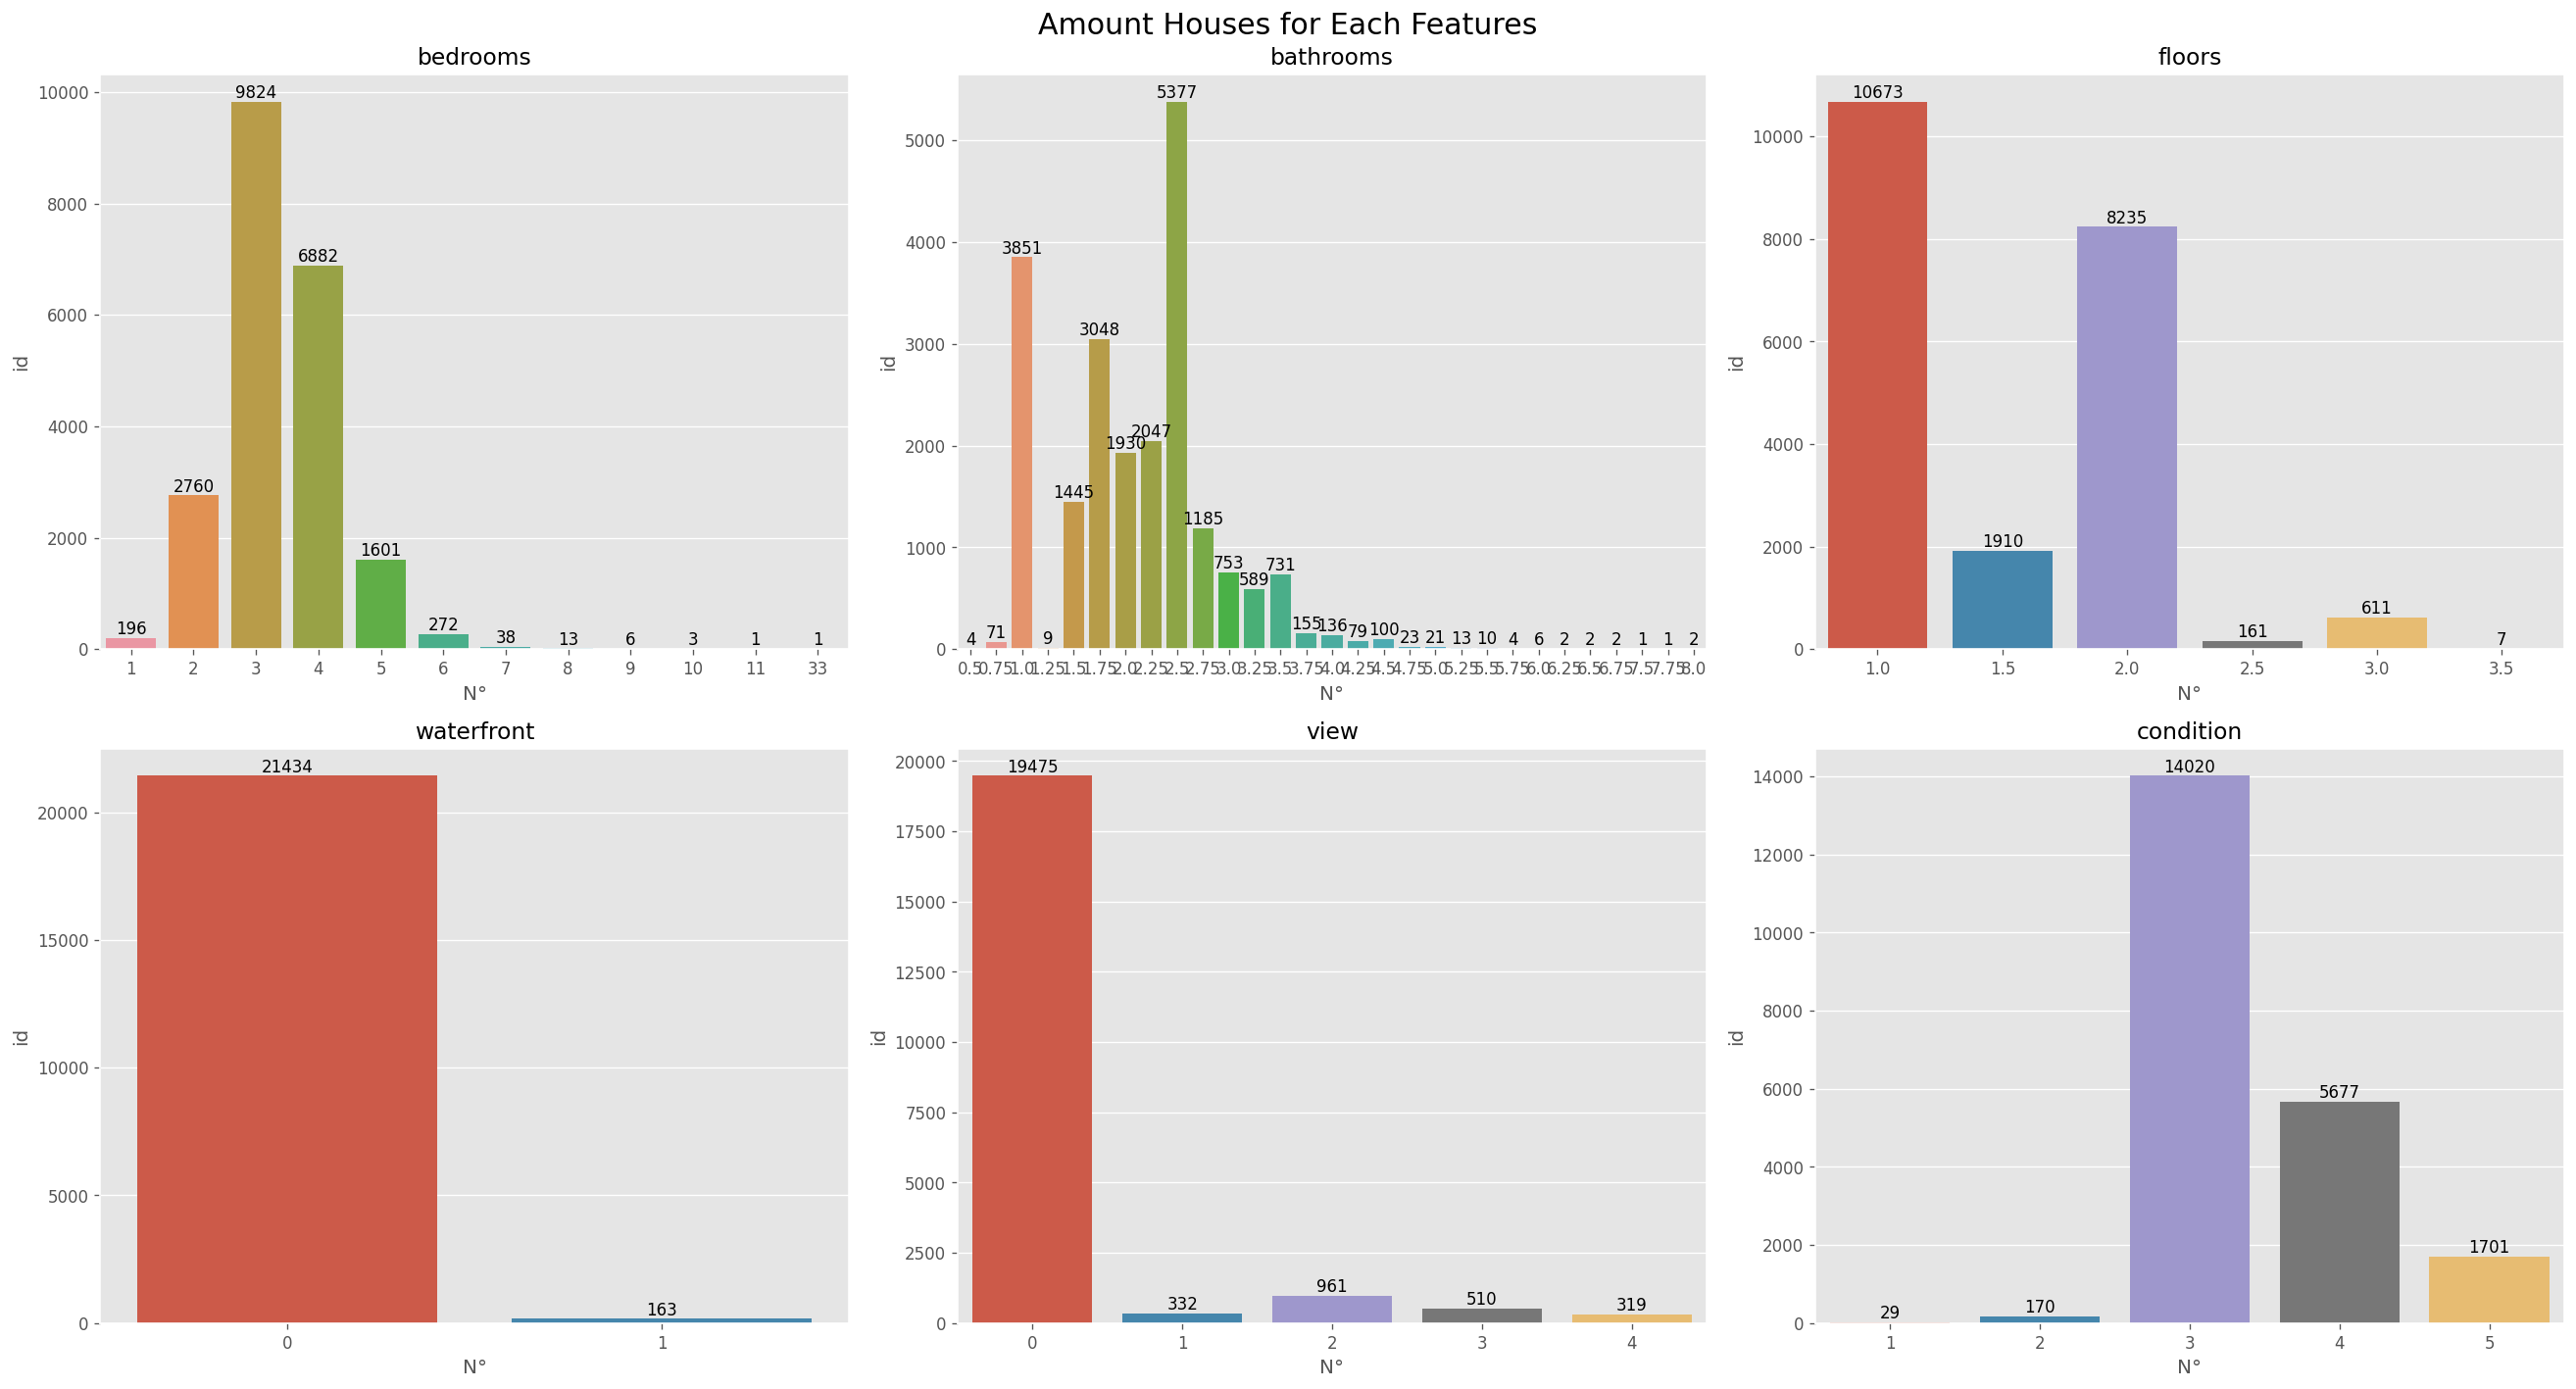

In [27]:
# Plot features for amount houses sales
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (22,12), dpi = 120, tight_layout = True)

feat = 0

for i in range(0, 2):
    for j in range(0, 3):
        
        gb = df.groupby([columns[feat]])['id'].count().reset_index()

        sns.barplot(data = gb, x = columns[feat], y = 'id', ax = ax[i,j])
        ax[i,j].bar_label(ax[i,j].containers[0])
        ax[i,j].set_xlabel("")
        ax[i,j].set_xlabel("N°")
        ax[i,j].set_title(columns[feat], fontsize = 14)
        feat += 1

fig.suptitle("Amount Houses for Each Features", fontsize = 18)
plt.show()

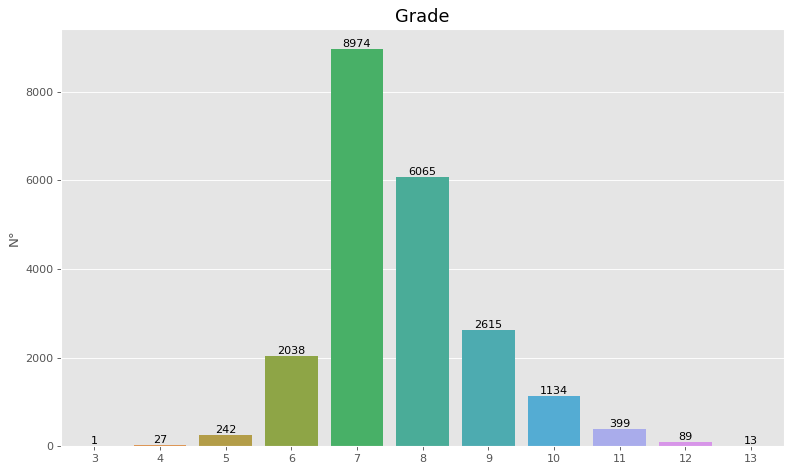

In [28]:
# Grade plot
fig = plt.figure(figsize=(10, 6), dpi = 80, tight_layout = True)
gb = df.groupby(['grade'])['id'].count().reset_index()

ax = sns.barplot(data = gb, x = 'grade', y = 'id')
ax.bar_label(ax.containers[0])

plt.title("Grade", fontdict={'fontsize': 16})
plt.xlabel("")
plt.ylabel("N°")
plt.show()

Se pueden realizar eliminaciones de las features de Waterfront y View, se trata de campos totalmente desbalanceados que aunque se realice un Data Binning, es difícil de balancear. El resto de las features tienen sesgo, pero es manejable para la transformación de datos.

#### 8. One of the customers is only interested in the following houses:

- Number of bedrooms either 3 or 4
- Bathrooms more than 3
- One Floor
- No waterfront
- Condition should be 3 at least
- Grade should be 5 at least
- Price smaller than 300000

For the rest of the things, they are not too concerned. Write code to find what are the houses available for them?


In [29]:
df[((df.bedrooms >= 3) & (df.bedrooms <= 4)) & (df.bathrooms > 3) & (df.floors == 1) & (df.waterfront == 0) & (df.condition >= 3) & (df.grade >= 5) & (df.price < 300000)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


No exsiten propiedades con dichas características.

#### 9. Your manager wants to find out the list of properties whose prices are twice more than the average of all the properties in the database. Write code to show them the list of such properties. 

In [30]:
mean_price = df['price'].mean()
df[df['price'] >= mean_price]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
5,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
10,1736800520,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
15,9297300055,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000,650000
21,2524049179,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,8956200760,4,2.50,3118,7866,2.0,0,2,3,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500,541800
21583,7202300110,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814,810000
21584,249000205,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964,1540000
21589,3448900210,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,610685


#### 10. Most customers are interested in properties with three or four bedrooms. What is the difference in average prices of the properties with three and four bedrooms? In this case you can simply use a `groupby` to check the prices for those particular houses.

In [31]:
df[(df['bedrooms'] >= 3) & (df['bedrooms']<= 4)].groupby(['bedrooms'])['price'].mean().reset_index()

,bedrooms,price
0,3,466276.590900
1,4,635564.677129


#### 11. What are the different locations where properties are available in your database? (distinct zip codes).

In [32]:
df.groupby(['zipcode'])['zipcode'].count().index.to_list()

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

#### 12. Show all the properties that were renovated.

In [33]:
df[df['yr_renovated'] > 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
35,9547205180,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,696000
95,1483300570,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,905000
103,2450000295,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,1090000
115,3626039325,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,740500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,7351200295,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,1150000
20041,126039256,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,434900
20428,4305600360,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,500012
20431,3319500628,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,356999


#### 13. Provide the details of the property that is the 11th most expensive property in your database.

In [34]:
df.sort_values('price', ascending = False).iloc[10].to_dict()

{'id': 6065300370.0,
 'bedrooms': 5.0,
 'bathrooms': 6.0,
 'sqft_living': 7440.0,
 'sqft_lot': 21540.0,
 'floors': 2.0,
 'waterfront': 0.0,
 'view': 0.0,
 'condition': 3.0,
 'grade': 12.0,
 'sqft_above': 5550.0,
 'sqft_basement': 1890.0,
 'yr_built': 2003.0,
 'yr_renovated': 0.0,
 'zipcode': 98006.0,
 'lat': 47.5692,
 'long': -122.189,
 'sqft_living15': 4740.0,
 'sqft_lot15': 19329.0,
 'price': 4210000.0}